In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs

In [4]:
exp_folder = '/cluster/sj1/bb_opt/experiments'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = '/cluster/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 38
batches = [10, 20, 100, 200]
batches = [10]
num_acks = 15

In [5]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [119]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'ARX_L343Q_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [120]:
tf_max = {}
tf_labels = {}
tf_rank = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())
    tf_labels[tf] = labels
    labels_sorted_idx = np.argsort(labels)[::-1]
    label_rank = np.ones(labels_sorted_idx.shape[0])
    for i in range(len(labels_sorted_idx)):
        label_rank[labels_sorted_idx[i]] = i+1
    tf_rank[tf] = label_rank

In [191]:
d = np.sort([np.exp(k) for k in tf_labels['EGR2_D383Y_R1_8mers.txt']])[::-1]

In [198]:
d[:100]

array([95796.664, 82845.43 , 73825.414, 72613.516, 69615.766, 67750.86 ,
       66328.38 , 65209.816, 63457.004, 63141.29 , 56020.96 , 55574.613,
       55364.336, 54123.617, 53424.945, 52978.008, 51477.633, 50059.695,
       49987.375, 49966.355, 48664.66 , 48589.49 , 46071.566, 45858.133,
       45774.33 , 45287.23 , 44999.43 , 44789.082, 44200.2  , 43781.844,
       41239.645, 40887.39 , 40347.23 , 40164.375, 40081.34 , 37911.97 ,
       37420.   , 37400.77 , 37346.062, 37324.13 , 37188.082, 36958.766,
       36911.316, 36720.35 , 36659.156, 36480.523, 36262.863, 36181.996,
       36157.195, 34818.59 , 34447.844, 34391.516, 34357.688, 34328.6  ,
       34142.92 , 33794.97 , 33783.496, 33360.973, 33099.21 , 33085.61 ,
       32796.81 , 32762.768, 32684.186, 32309.998, 31802.678, 31777.938,
       31495.959, 31331.637, 31318.432, 31313.115, 31289.086, 31167.727,
       31107.03 , 30834.502, 30821.889, 30596.385, 30462.803, 30360.945,
       30070.512, 29906.268, 29801.012, 29745.303, 

In [197]:
print(d[25])

45287.23


In [9]:
arrs = {}

In [10]:
import collect_stats as cs

In [146]:
to_read = {
    #'ensemble7/o_none_ucb_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_ucb_step_0.1_modelseed_': [None, 'e7_ucb_step_0.1'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e7_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e7_invar_g80'],
    #'ensemble7/o_none_ucb_dataseed_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_' : [None, 'e7_datarand_invar_g80'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_' : [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_': [None, 'e7_datarand_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxvar_inverse_g000510204080_': [None, 'MODD'],
    #'ensemble9/o_none_ucb_modelseed_': [None, 'e9'],
    #'ensemble9/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e9_maxvar_g80'],
    #'ensemble9/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e9_invar_g80'],
    #'ensemble9/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e9_inoutvar_g80'],
    #'ensemble7/o_kriging_believer_kb_modelseed_': [None, 'e7_kb'],
    #'ensemble7/o_empirical_kb_div_3_modelseed_': [None, 'e7_empirical_kb'],
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_modelseed_': [None, 'e7_wekb_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_': [None, 'e7_wekb_0.5_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_': [None, 'e7_wekb_mean_0.5_div10'],
    #'ensemble7/o_kb_dataseed_modelseed_': [None, 'e7_datarand_kb'],
    #'ensemble10/o_kb_dataseed_modelseed_': [None, 'e10_datarand_kb'],
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e10_datarand_wekb_div10'],
    #'ensemble11/o_kb_dataseed_modelseed_': [None, 'e11_datarand_kb'],
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e11_datarand_wekb_div10'],
    #'ensemble11/o_kb_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb'],
    #'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'mal_datarand_wekb_div10'],
    #'ensemble11/o_kb_nolog_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb_nolog'],
    #'ensemble12/o_none_ucb_': [None, 'e7_2'],
    #'ensemble12/o_none_ucb_maxinvar_g000510204080_': [None, 'maxinvar2'],
    #'ensemble12/o_none_ucb_maxvar_g000510204080_': [None, 'maxvar2'],
    #'ensemble12/o_none_ucb_maxvar_id_g000510204080_': [None, 'modr2'],
    #'ensemble13/o_info_mves_div_5_minhsic_1_': [None, 'mves_div_5_minhsic_1'],
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0_': [None, 'mves_bs_0'],
    #'ensemble13/o_none_ucb_': [None, 'e13'],
    #'ensemble13/o_pdts_ucb_rand_randdiv_3_': [None, 'pdts_randdiv_3'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_': [None, 'mves_bs_0_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_bs_0_it20_fp'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.0_bs_0_fill_pdts_': [None, 'mves_bs_0_it20_fp_mh_0'],
    #'ensemble13_init_train_20/o_none_ucb_': [None, 'e13_it20'],
    #'ensemble13_init_train_20/o_none_ucb_rand_randdiv_3_': [None, 'e13_it20_randdiv_3'],
    #'ensemble13_init_train_20/o_none_ucb_rand_randdiv_2_': [None, 'e13_it20_randdiv_2'],
    #'ensemble13_init_train_20/o_none_ucb_rand_randdiv_1_': [None, 'e13_it20_randdiv_1'],
    #'ensemble13_init_train_20/o_info_rand_mves_div_5_randdiv_1_': [None, 'mves_it20_fucb_randdiv_1'],
    #'ensemble13_init_train_20/o_ei_ucb_': [None, 'ei_it20'],
    #'ensemble13_init_train_20/o_pdts_ucb_rand_div_5_': [None, 'pdts_rand_div_5'],
    #'ensemble13_init_train_20/o_pdts_ucb_rand_div_3_': [None, 'pdts_rand_div_3'],
    #'ensemble13_init_train_20/o_info_rand_mves_div_5_fucb_randdiv_3_': [None, 'mves_it20_div_5_randdiv_3_fucb'],
    #'ensemble13_init_train_20/o_info_rand_mves_div_5_fp_randdiv_3_': [None, 'mves_it20_div_5_randdiv_3_fp'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0.9_': [None, 'mves_bs_0.9_it20'],
    #'ensemble13_init_train_20/o_pdts_ucb_': [None, 'pdts_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_1_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_div_1_bs_0_it20'],
    #'ensemble13_init_train_20/o_er_pdts_ucb_div_5_': [None, 'er_pdts_div_5_it20'],
    #'ensemble13_init_train_10/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_bs_0_it10_fp'],
    #'ensemble13_init_train_10/o_pdts_ucb_': [None, 'pdts_it10'],
    #'ensemble13/o_pdts_ucb_': [None, 'pdts'],
    #'ensemble13/o_info_pdts_cond_div_2_fp_': [None, 'pdts_cond_fp'],
    #'ensemble13/o_info_pdts_cond_div_5_lasso_fp_': [None, 'lasso'],
    'ensemble13/o_info_rand_pdts_cond_div_5_rdiv_1_lasso_fp_': [None, 'lasso_rdiv_condense_1'],
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_0.5_': [None, 'pdts_rdiv_condense_0.5'],
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_': [None, 'pdts_rdiv_condense_1'],
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_2_': [None, 'pdts_rdiv_condense_2'],
    #'ensemble13/o_info_m80_mves_div_5_fp_': [None, 'mves_m80_fp'],
    #'ensemble13/o_info_pdts_cond_div_20_lasso_fp_': [None, 'pdts_cond_lasso_fp'],
    #'ensemble13/o_info_mves_div_5_fp_': [None, 'mves_fp'],
    #'ensemble13/o_pdts_ucb_rand_rdiv_1_': [None, 'pdts_rand_rdiv_1'],
    #'ensemble13/o_none_ucb_rand_rdiv_1_': [None, 'ucb_rand_rdiv_1'],
    #'ensemble13/o_none_ucb_0.9_': [None, 'bs_0.9'],
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.9_': [None, 'mves_bs_0.9'],
}

In [168]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=40, mode="bayes_opt")
    #cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")

reading ensemble13/o_info_rand_pdts_cond_div_5_rdiv_1_lasso_fp_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16
reading sample 17
reading sample 18
reading sample 19
reading sample 20


In [148]:
to_eval = [
    #'ensemble13/o_pdts_ucb_',
    'ensemble13/o_info_pdts_cond_div_5_lasso_fp_',
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_0.5_',
    'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_',
    'ensemble13/o_info_rand_pdts_cond_div_5_rdiv_1_lasso_fp_',
]

In [14]:
idx_data_extractor = lambda x, filename : x['idx_frac'][0].item()

In [15]:
ack_rel_opt_val_data_extractor = lambda x, filename : x['ack_rel_opt_value']

In [160]:
train_rmse_fn = lambda x, filename : x['logging'][1]['train']['std']

In [126]:
def ir_regret_fn(x, filename): 
    temp = x['ir_batch_cur_idx'].numpy().tolist()
    temp2 = set(x['ack_idx'].numpy().tolist())
    temp3 = None
    for k in temp[::-1]:
        if k not in temp2:
            break
    return np.exp(max(tf_labels[filename][k], tf_labels[filename][x['ack_idx']].max()))

def ack_regret_fn(x, filename): 
    return np.exp(max(tf_labels[filename][x['ack_idx']].max(), tf_labels[filename][x['idx_at_each_iter'][0]].max()))
    #return np.exp(tf_labels[filename][x['ack_idx']].max())
    
def ack_rank_regret_fn(x, filename):
    return min(tf_rank[filename][x['ack_idx']].min(), tf_rank[filename][x['idx_at_each_iter'][0]].min())



In [ ]:
cs.prop_test(10, 
             filenames,
             idx_data_extractor,
             #ack_rel_opt_val_data_extractor,
             arrs, 
             [to_eval[3], to_eval[1]],
             29,
             pval_threshold=1,
             paired_test=True,
             single_test=True,
            )

In [206]:
cs.prop_test(10, 
             filenames, 
             ack_regret_fn,
             #ack_rel_opt_val_data_extractor,
             #ack_rank_regret_fn,
             arrs,
             [to_eval[1], to_eval[2]],
             29,
             num_samples=20,
             pval_threshold=1,
             paired_test=True,
             single_test=True,
             comparator=lambda x,y : x < y,
            )

comparing pdts_rdiv_condense_1 lasso_rdiv_condense_1
HESX1_E149K_R1_8mers.txt 0.977153498167526 0.022846501832474074 20453.832 18854.684 	 (std: 3759.67041 3569.61938, #n: 20 20)
EGR2_D383Y_R1_8mers.txt 0.46404890839523083 0.5359510916047692 68593.44 69085.11 	 (std: 19193.23633 21054.54492, #n: 20 20)
BCL6_H676Y_R1_8mers.txt 0.9187250004851365 0.08127499951486353 10437.685 10375.498 	 (std: 186.55664 248.74220, #n: 20 20)
ARX_L343Q_R1_8mers.txt 0.5755479536743648 0.42445204632563516 82094.72 82039.54 	 (std: 791.73315 992.07166, #n: 20 20)
CRX_E80A_R1_8mers.txt 0.40545865084653054 0.5945413491534695 325953.22 326846.56 	 (std: 17448.41406 16678.28125, #n: 20 20)
ESX1_K193R_R1_8mers.txt 0.5555515061319156 0.4444484938680844 26248.324 26175.3 	 (std: 2919.44824 2233.30737, #n: 20 20)
FOXC1_F112S_R1_8mers.txt 0.2813306455048342 0.7186693544951658 84638.39 84693.54 	 (std: 371.11258 314.25439, #n: 20 20)
GFI1B_A204T_R1_8mers.txt 0.7309846059517958 0.2690153940482042 143335.14 142543.42 	 

In [111]:
cs.prop_test(10, 
             filenames, 
             ir_regret_fn,
             arrs, 
             [to_eval[1], to_eval[2]],
             29,
             pval_threshold=1,
             paired_test=True,
            )

comparing pdts_rdiv_condense_1 lasso
HESX1_E149K_R1_8mers.txt 0.41863830220107523 0.5813616977989248 19435.875 19329.193 	 (std: 3790.29712 3691.23364, #n: 40 40)
ARX_L343Q_R1_8mers.txt 0.9067951672493466 0.09320483275065342 82149.24 82397.8 	 (std: 838.84595 946.39209, #n: 40 40)
CRX_E80A_R1_8mers.txt 0.8517181917602168 0.14828180823978318 322304.3 326283.75 	 (std: 19492.19531 21867.04102, #n: 40 40)
FOXC1_F112S_R1_8mers.txt 0.9937993340616927 0.006200665938307309 84655.74 84778.8 	 (std: 321.68634 204.05173, #n: 40 40)
GFI1_L400F_R1_8mers.txt 0.9396768501635717 0.06032314983642824 76455.58 80159.484 	 (std: 13085.21191 12977.82129, #n: 40 40)
HOXC4_N178S_R1_8mers.txt 0.3759410633779411 0.6240589366220589 171126.1 170655.67 	 (std: 9669.48633 9616.83984, #n: 40 40)
KLF1_E325K_R1_8mers.txt 0.5656337553967589 0.43436624460324114 1187.8821 1192.2946 	 (std: 137.78114 156.73033, #n: 40 40)
NR1H4_C144R_R1_8mers.txt 0.6814190413366211 0.3185809586633789 17942.592 17949.86 	 (std: 112.74921

In [268]:
cs.uniform_baseline(
    3,
    tf_labels,
    20, 
    filenames, 
    ack_regret_fn, 
    #ack_rel_opt_val_data_extractor,
    arrs,
    to_eval[5], 
    14, 
    pval_threshold=1, 
)

IndexError: list index out of range

In [ ]:
cs.prop_test(100, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             9,
             pval_threshold=0.2,
             paired_test=True,
            )

In [ ]:
cs.prop_test(100, filenames, ir_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=0.2, paired_test=True)

In [ ]:
cs.prop_test(100, filenames, ack_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=1.4, paired_test=True)

In [ ]:
cs.prop_test(200, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             29, 
             pval_threshold=1,
             paired_test=True,
            )

In [ ]:
cs.prop_test(200, filenames, ack_rel_opt_val_data_extractor, arrs, [to_eval[-2], to_eval[-1]], 29, pval_threshold=1.4, paired_test=True)

In [101]:
to_eval = [
    #'ensemble13/o_pdts_ucb_',
    'ensemble13/o_info_pdts_cond_div_5_lasso_fp_',
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_0.5_',
    'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_',
]

In [ ]:
ack_iter = 14
for batch_size in [10]:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        filename_printed = False
        for experiment in to_eval:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            try:
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) <= ack_iter:
                        continue
                    num_used += 1
                    mean = 0
                    #for i in range(len(stats[filename][batch_size])):
                        #mean += stats[filename][batch_size][i]['logging'][1]['best']['nll']
                    if len(stats[filename][batch_size]) > 0:
                        mean /= (len(stats[filename][batch_size]))
                    #val_nll += stats[filename][batch_size][0]['logging'][1]['best']['nll']
                    val_nll += mean
                    if idx_frac is None:
                        idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                        #idx_frac = tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                        #idx_frac = stats[filename][batch_size][ack_iter]['corr_stats'][1]
                    else:
                        idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
                        #idx_frac = torch.max(idx_frac, stats[filename][batch_size][ack_iter]['idx_frac'])
                        #idx_frac = idx_frac + tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                        #idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['corr_stats'][1]
                if num_used > 0:
                    if not filename_printed:
                        print(filename)
                        filename_printed = True
                    idx_frac = idx_frac/num_used
                    #idx_frac = idx_frac.numpy()
                    print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
                    #print(arrs[experiment][1] + ":", str(idx_frac), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
            except Exception as e:
                pass

In [59]:
import collect_stats as cs

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


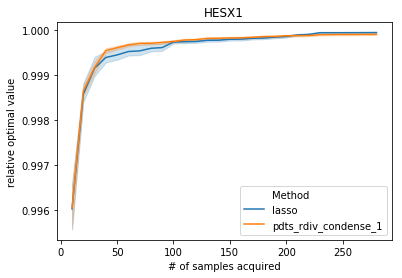

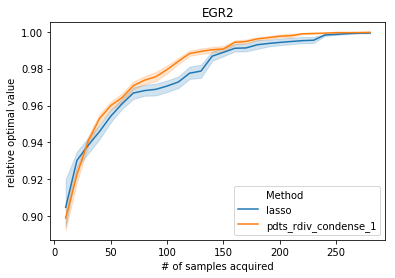

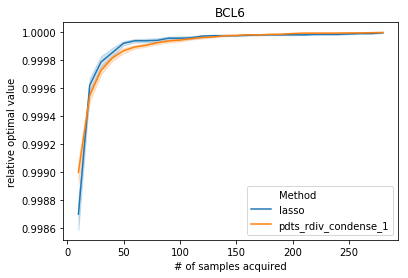

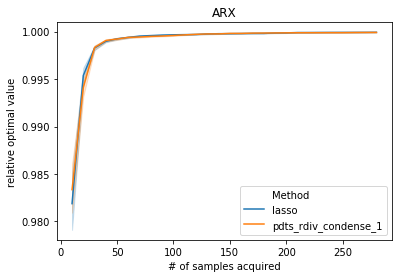

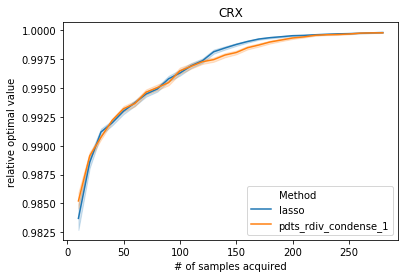

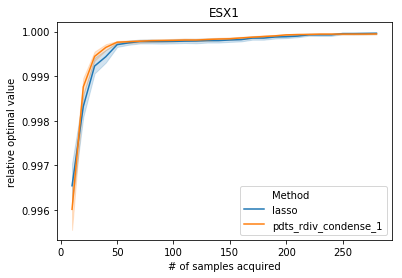

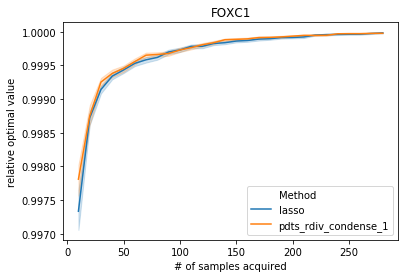

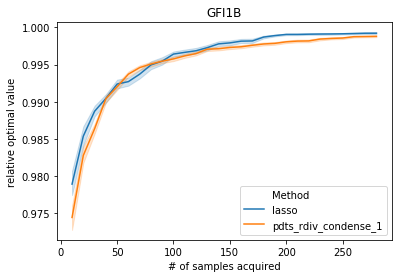

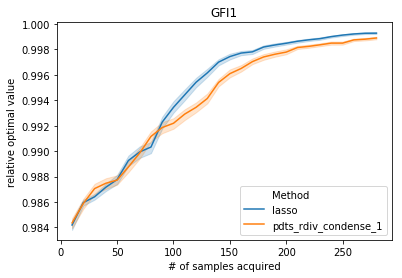

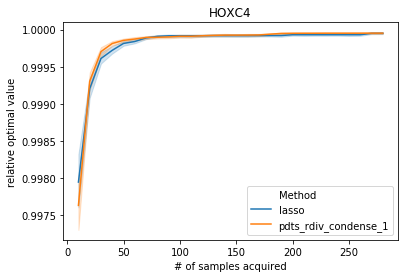

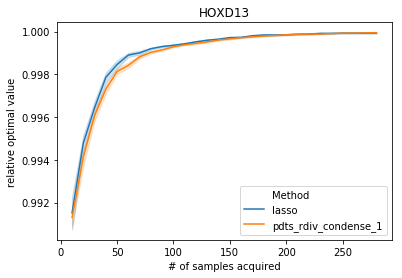

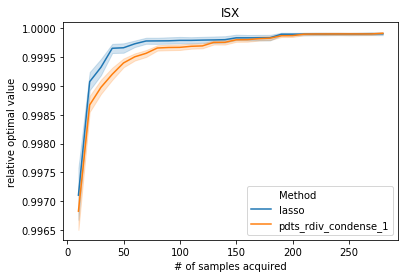

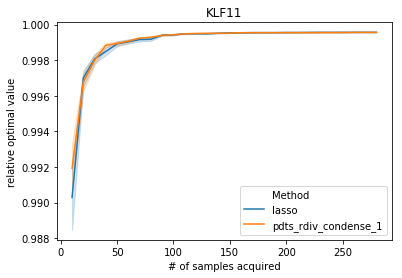

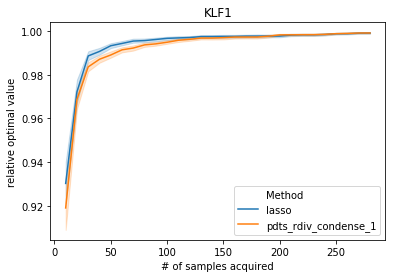

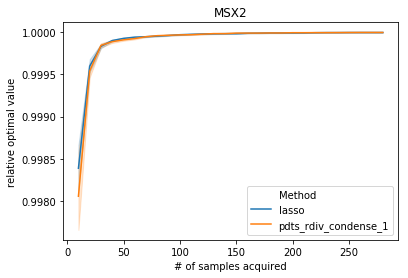

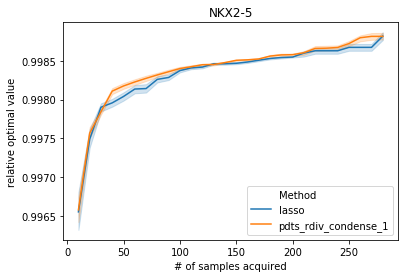

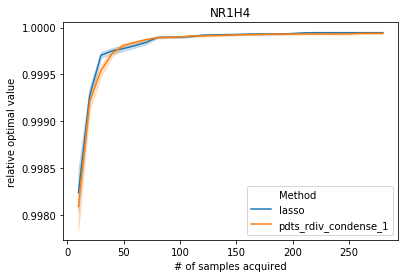

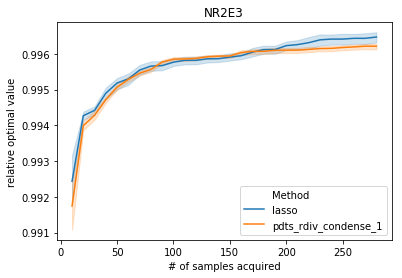

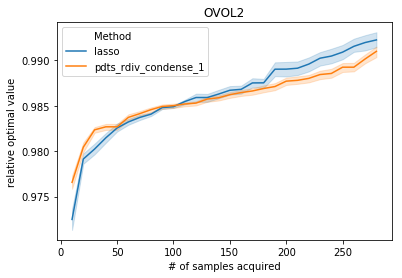

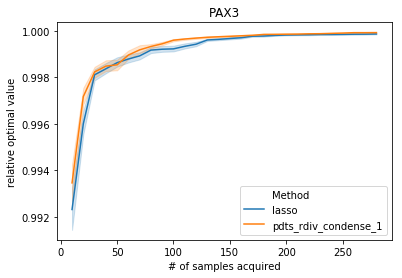

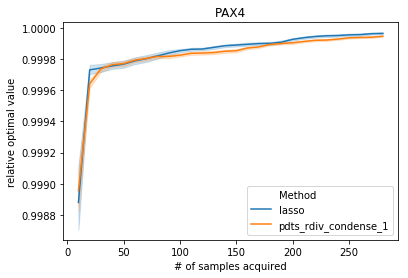

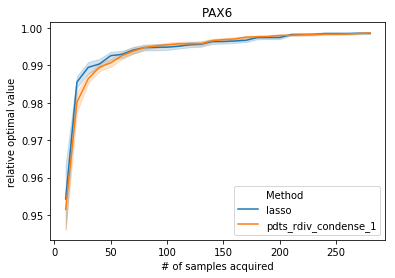

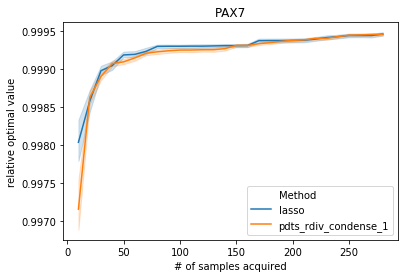

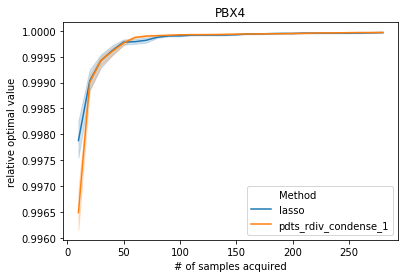

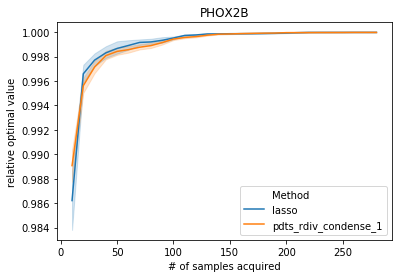

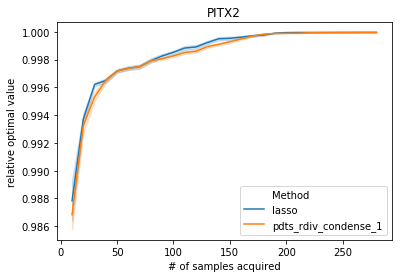

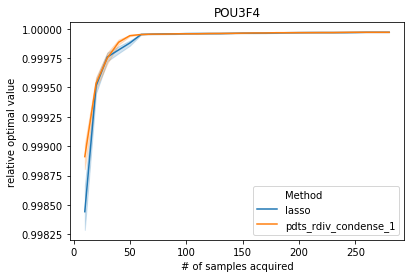

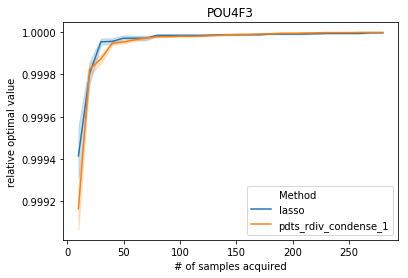

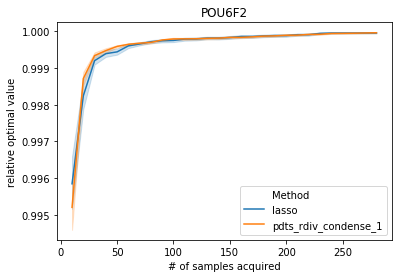

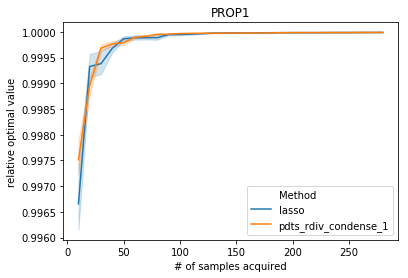

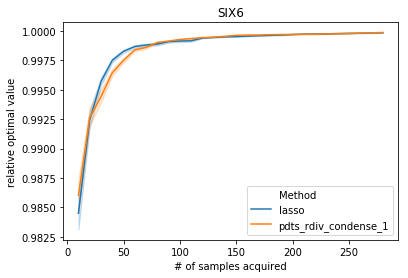

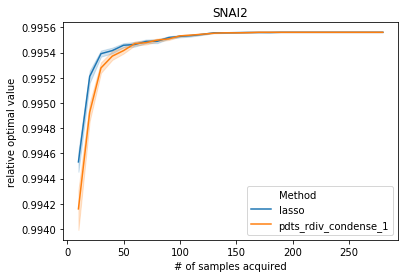

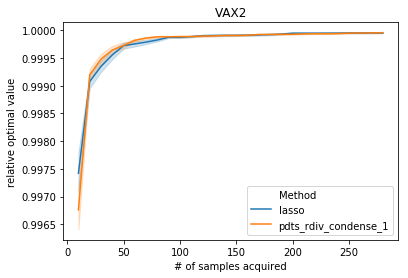

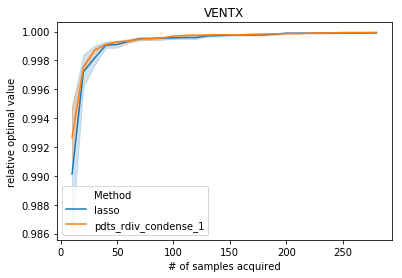

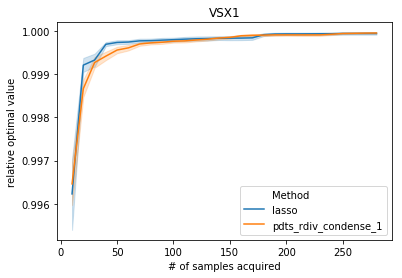

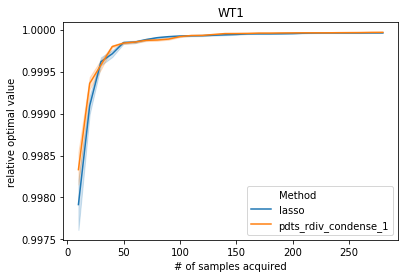

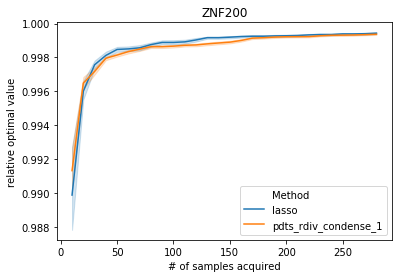

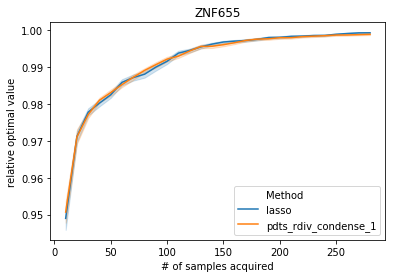

In [102]:
cs.plot_data_vs_ack_iter_with_ci(
    10,
    filenames,
    'relative optimal value',
    #ack_regret_fn,
    ack_rel_opt_val_data_extractor,
    29,
    arrs,
    to_eval,
    legend_loc=3,
    figsize=(6, 4),
    num_samples_label=True,
    #save_path='/cluster/sj1/bb_opt/plots',
    ci=50,
)